# PRML Assignemt 6

@uthor :- Darshil Patel(202011034)

In [ ]:
#useful librarys for this assigment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load iris data
def load_iris_data():
  data = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None,sep=',')
  data.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'flower_class']
  return data

# euclidean distence formula
def D(p1,p2):
  return np.linalg.norm(np.array(p1)-np.array(p2))

# clusterinfg algorithum
def clustering(data,centroid):

  # number of clusters
  k = len(centroid)

  # number of data points
  n = len(data)

  # start with empty clusters
  clusters = [[] for _ in range(k)]

  # using euclidean distance from centroid find appropriate cluster
  for data_no in range(n):
    # select nearest centroid
    cluster_no = np.argmin([D(data[data_no], centroid[i]) for i in range(k)])
    clusters[cluster_no].append(data_no)
  return clusters

# algorithum for k mens clustering
def Kmeans(data,k,itr):
  #number of data points
  n = len(data)

  # random k different centroids form data points
  centroid = [np.array(data[i]) for i in np.random.randint(150,size = k)]
  
  # previous centroid se as all zero vectors
  prv_centroid = [c-c for c in centroid]
  clusters = []
  itr_no = 0

  # terminates if completes maximum iteration or centroid does not change
  while itr_no < itr:
    prv_centroid = centroid

    # get clusteres
    clusters = clustering(data,centroid)

    # generate new centroids
    centroid = [np.mean(np.array([data[i] for i in c]),axis = 0) for c in clusters]

    # if no change in centroid then terminate  
    if np.sum([D(c1,c2) for c1,c2 in zip(centroid,prv_centroid)]) == 0:
      itr_no = itr
    itr_no += 1
  return clusters

In [ ]:
# load data
data = load_iris_data()
x_train = data.iloc[:,:-1].to_numpy()
y_train = data.iloc[:,-1].to_numpy()
print(x_train.shape)
print(y_train.shape)

(150, 4)
(150,)


In [ ]:
# get real clusters
labels = list(np.unique(y_train))
real_clusters = [[] for _ in range(len(labels))]
for i in range(len(y_train)):
  for l in range(len(labels)):
    if y_train[i] == labels[l]:
      real_clusters[l].append(i)

In [ ]:
# get clusters using k menas clustering
k = 3
max_itr = 50
clusters = Kmeans(x_train,k,max_itr)

In [ ]:
# print real clusters
print("real clusters:-")
for c in real_clusters:
  print(c)

# print kmeans clusters
print("kmeans clusters:-")
for c in clusters:
  print(c)

real clusters:-
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
kmeans clusters:-
[50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1

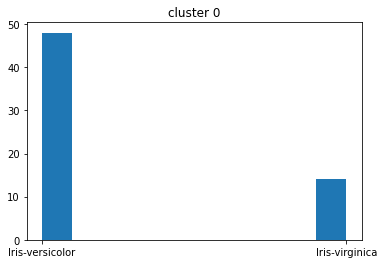

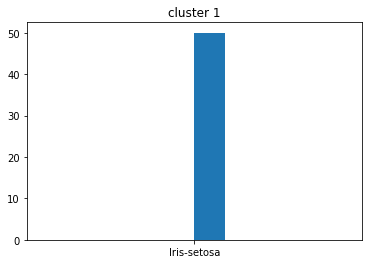

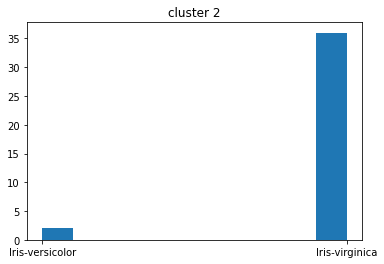

In [ ]:
# Histogram of clusters and the number of flower types
for c in range(len(clusters)):
  plt.hist([y_train[i] for i in clusters[c]])
  plt.title("cluster "+str(c))
  plt.show()

In [ ]:
# experiment 10 times and get clusters
for i in range(10):
  print("----------------experiment",i+1,"-----------------------")
  
  # find clusters
  e_clusters = Kmeans(x_train,k,max_itr)
  
  # print clusters
  print("clusters:-")
  for c in e_clusters:
    print(c)

----------------experiment 1 -----------------------
clusters:-
[50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149]
[52, 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
----------------experiment 2 -----------------------
clusters:-
[50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 1

In [ ]:
from sklearn.cluster import KMeans
y_prid = KMeans(n_clusters=3).fit_predict(x_train)

# get predicted clusters
clstr = list(np.unique(y_prid))
prid_clusters = [[] for _ in range(len(clstr))]
for i in range(len(y_prid)):
  for l in range(len(clstr)):
    if y_prid[i] == clstr[l]:
      prid_clusters[l].append(i)

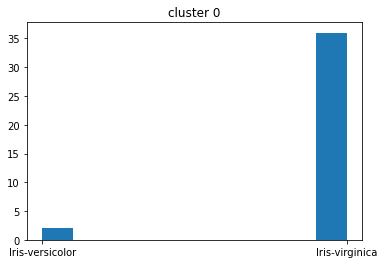

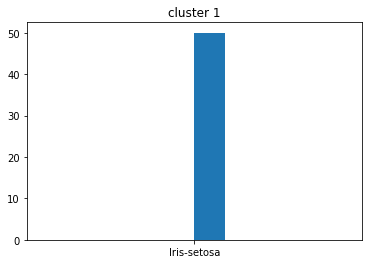

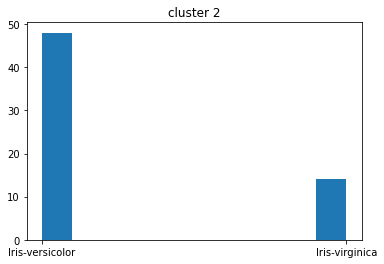

In [ ]:
# Histogram of clusters and the number of flower types
for c in range(len(prid_clusters)):
  plt.hist([y_train[i] for i in prid_clusters[c]])
  plt.title("cluster "+str(c))
  plt.show()

In [ ]:
# print real clusters
print("real clusters:-")
for c in real_clusters:
  print(c)

# print My kmeans clusters
print("My kmeans clusters:-")
for c in clusters:
  print(c)

# print kmeans clusters
print("sklearn kmeans clusters:-")
for c in prid_clusters:
  print(c)

real clusters:-
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
My kmeans clusters:-
[50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16